# life cycle Machine Learning 
1. Problem Statement
2. Data collection
3. Exploring data(data preprocessing )
4. Data Split into 2 part Test(20%-30%) and Train(80%-70%)
5. Build Model
    Regression: linear Regression
    SVM, Decision Tree, Random Forest
    Classification: logistic Regression, SVM, Decision Tree, Random Forest
6. Train the model by train dataset
7. Predict the model by test dataset
8. Evaluate 
9. Predict New values

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [3]:
df= pd.read_csv("Student_Performance.csv")

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [6]:
df.sample(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
685,1,93,Yes,8,0,68.0
7909,2,52,Yes,9,8,28.0
6568,3,77,Yes,6,9,56.0
5344,8,64,No,6,7,61.0
2180,6,70,No,7,7,60.0
212,5,41,No,8,4,26.0
8943,8,86,Yes,6,4,82.0
4374,1,77,No,8,7,51.0
1471,9,88,Yes,8,5,87.0
50,4,44,Yes,7,6,27.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Extracurricular Activities']=le.fit_transform(df['Extracurricular Activities'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int32  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int32(1), int64(4)
memory usage: 429.8 KB


In [11]:
df.sample()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6474,1,43,1,9,2,18.0


In [12]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


<Axes: >

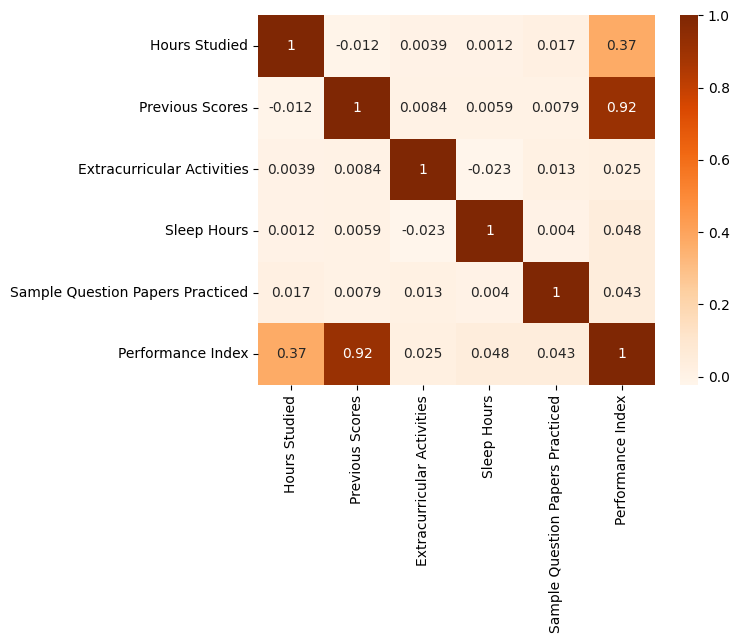

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='Oranges')

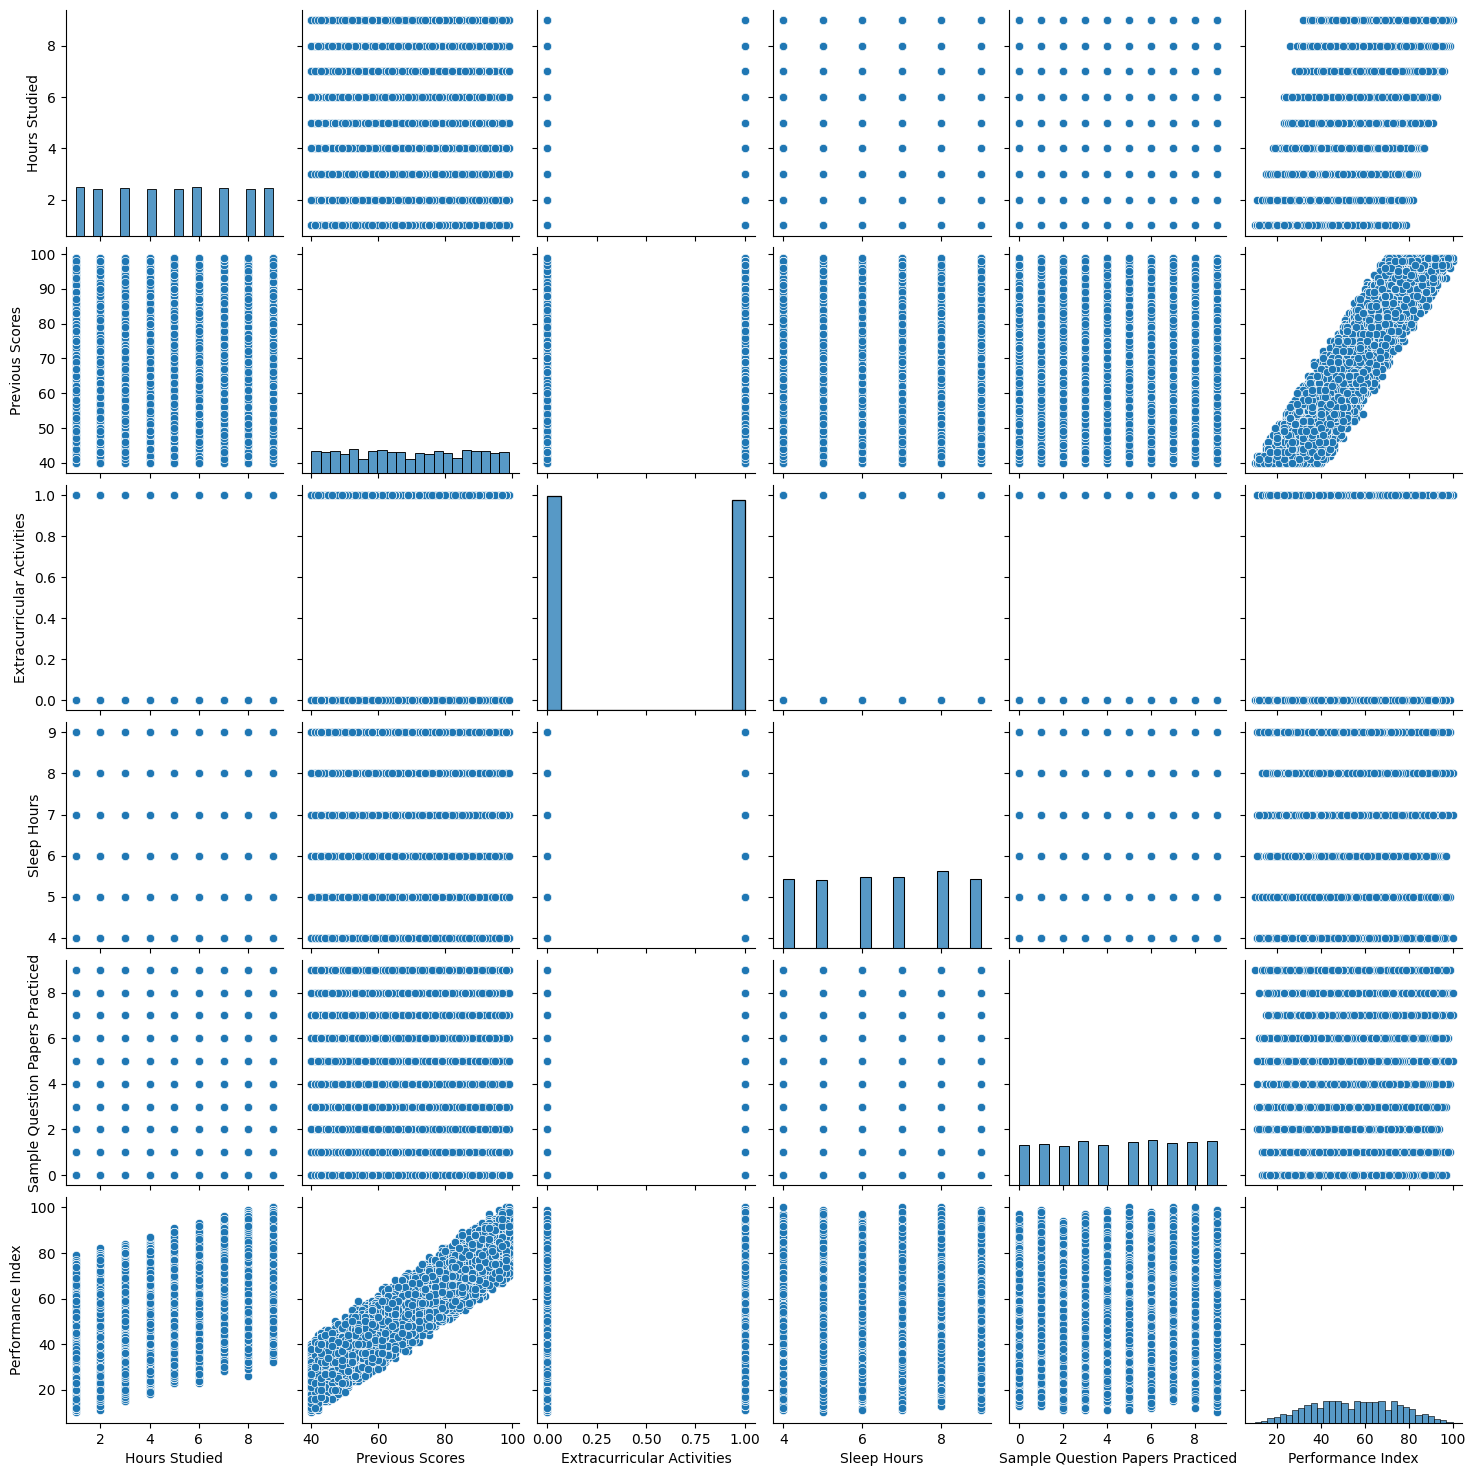

In [14]:
sns.pairplot(df)

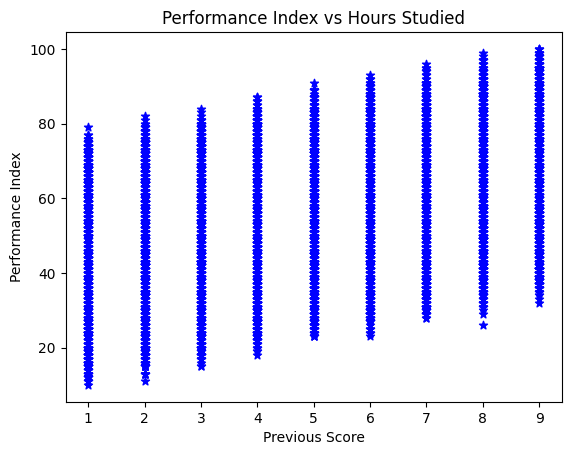

In [15]:
plt.scatter(df['Hours Studied'],df['Performance Index'],color='blue',marker='*')
plt.title('Performance Index vs Hours Studied')
plt.xlabel('Previous Score')
plt.ylabel('Performance Index')
plt.show()

In [16]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [17]:
dp=df.duplicated()
dp

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [18]:
df=df.drop_duplicates()

In [19]:
df.shape

(9873, 6)

In [20]:
len(df)

9873

In [21]:
x= df.drop(['Performance Index'],axis=1)
y= df['Performance Index']
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.2,random_state=42)



In [22]:
test_y.head(5)

6099    47.0
106     76.0
9265    62.0
4707    23.0
2155    76.0
Name: Performance Index, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression

# Equation of line 
y=mx+c

In [24]:
model= LinearRegression()
model.fit(train_x,train_y) 

LinearRegression()

In [25]:
predict_y= model.predict(test_x)

In [26]:
len(predict_y)

1975

In [27]:
len(test_y)

1975

predict me test value deni hai 
fit() is used for training
train value pass karni hoti hai 

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
print(f'Mean Absolute Error is {round(mean_absolute_error(test_y,predict_y),2)}')

Mean Absolute Error is 1.65


In [30]:
print(f'Mean Squared Error is {round(mean_squared_error(test_y,predict_y),2)}')

Mean Squared Error is 4.31


In [31]:
print(f'Mean R2 score is {round(r2_score(test_y,predict_y),2)}')

Mean R2 score is 0.99


In [32]:
model.predict(x.head(10))

array([91.81161906, 63.19975175, 45.02254154, 36.5437596 , 67.07820919,
       59.39018958, 64.38765525, 38.25055424, 62.8469151 , 69.95135684])

In [33]:
y.head(2)

0    91.0
1    65.0
Name: Performance Index, dtype: float64

In [34]:
model.predict([[2,79,5,8,2]])

c:\Users\User\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([59.19982494])

In [35]:
model.predict([[5,89,5,9,5]])

c:\Users\User\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([78.97537833])

In [36]:
model.predict([[2,99,8,10,2]])

c:\Users\User\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([82.2340473])